<a href="https://colab.research.google.com/github/alixosravi/Game_Of_Life/blob/main/Game_of_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
from matplotlib import pyplot as plt
import time
from IPython.display import  clear_output
from time import sleep
from tqdm import tqdm
import random

In [33]:
universe = np.zeros((20, 20))
for i in [random.randint(5, 15) for _ in range(7)]:
  for j in [random.randint(5, 15) for _ in range(7)]:
      universe[i, j] = 1


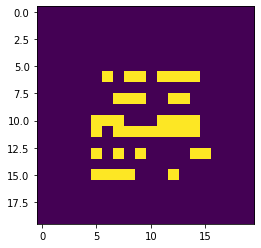

In [34]:
plt.imshow(universe)

In [37]:
def find_neighbours(cell_ind: tuple, universe: np.array):
  num_neighbours = 0
  l0 = universe.shape[0]
  l1 = universe.shape[1]

  for i in [-1, 0, 1]:
    for j in [-1, 0, 1]:
      if (i != 0) or (j != 0):
          if cell_ind[0] + i == l0:
            i = - cell_ind[0]
          if cell_ind[1] + j == l1:
            j = - cell_ind[1]

          if universe[cell_ind[0] + i, cell_ind[1] + j] == 1:
            num_neighbours += 1

  return num_neighbours

In [40]:
def pass_time(universe):
    num_neighbours_map = np.zeros(universe.shape)

    for i in range(universe.shape[0]):
      for j in range(universe.shape[1]):
        num_neighbours_map[i, j] = find_neighbours((i, j), universe)
    new_universe = np.zeros(universe.shape)
    survivors = (universe == 1) & ((num_neighbours_map == 2) | (num_neighbours_map == 3))
    zombie = (universe == 0) & (num_neighbours_map == 3)
    new_universe = (survivors == 1) | (zombie == 1)
    return new_universe

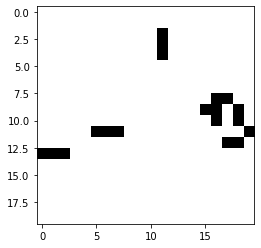

In [42]:
num_turns = 50
new_universe = universe
for _ in range(num_turns):
  new_universe = pass_time(new_universe)
  plt.imshow(new_universe, cmap="Greys")
  plt.show()
  sleep(0.1)
  clear_output(wait=True)

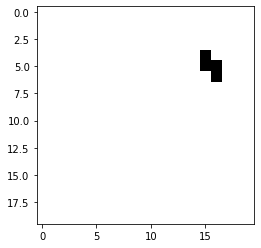

In [21]:
plt.imshow(new_universe, cmap="Greys")